In [22]:
import numpy as np
import pandas as pd
import pymc3 as pm
import arviz as az

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
az.style.use('arviz-darkgrid')

# Easy       

## 8E1
Metropolis algorithm - Proposal distribtion must be symmetric. Probability of jumping from A->B is equal to the probability of jumping from B->A

Metropolis hastings allows for assymetric proposals.

## 8E2

Gibbs sampler is more efficient -> fewer samples to get a good estimate of posterior distribution -- relative to metropolis approach. Gibbs uses adaptive proposals -> distribution of proposed parameter adjusts itself depending on current parameter values.

Limitation - Requires conjugate priors.

## 8E3

HMC can't sample discrete variables or distributions like poisson and binomial distributions (unless its in the likelihood). Can't flow or 'move' between integers.

## 8E4

n_eff, the effective number of samples, does a statistical adjustment to say: if we had a chain with samples that were uncorrelated with each other (a 'perfect' chain), how many samples would be need to have the same information in the actual chain. 

## 8E5

RHat should approach 1. 

# Medium

## 8M1

In [10]:
rugged_df = (pd.read_csv('/Users/benjaminwee/Documents/courses/resources/Rethinking/Data/rugged.csv', sep=';')
               .assign(log_gdp=lambda rugged: np.log(rugged.rgdppc_2000))
               .dropna(subset=['log_gdp']))

In [15]:
with pm.Model() as m1_1:
    a = pm.Normal('a', 0, 100)
    bR = pm.Normal('bR', 0, 10)
    bA = pm.Normal('bA', 0, 10)
    bAR = pm.Normal('bAR', 0, 10)
    mu = a + bR * rugged_df.rugged + bA * rugged_df.cont_africa + bAR * rugged_df.rugged * rugged_df.cont_africa
    sigma = pm.Uniform('sigma', 0, 10)
    log_gdp = pm.Normal('log_gdp', mu, sigma, observed=rugged_df.log_gdp)
    trace_m1_1 = pm.sample(1000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bAR, bA, bR, a]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:04<00:00, 1829.02draws/s]


In [16]:
with pm.Model() as m1_2:
    a = pm.Normal('a', 0, 100)
    bR = pm.Normal('bR', 0, 10)
    bA = pm.Normal('bA', 0, 10)
    bAR = pm.Normal('bAR', 0, 10)
    mu = a + bR * rugged_df.rugged + bA * rugged_df.cont_africa + bAR * rugged_df.rugged * rugged_df.cont_africa
    sigma = pm.Exponential('sigma', 1)
    log_gdp = pm.Normal('log_gdp', mu, sigma, observed=rugged_df.log_gdp)
    trace_m1_2 = pm.sample(1000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bAR, bA, bR, a]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:05<00:00, 1546.67draws/s]


In [17]:
az.summary(trace_m1_1, ['~mu'])

mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
a      9.229  0.142   8.978    9.518      0.003    0.002    1834.0  1833.0   
bR    -0.205  0.079  -0.350   -0.057      0.002    0.001    1978.0  1930.0   
bA    -1.956  0.231  -2.416   -1.540      0.006    0.004    1710.0  1680.0   
bAR    0.397  0.135   0.155    0.653      0.003    0.002    1853.0  1789.0   
sigma  0.951  0.051   0.859    1.050      0.001    0.001    3130.0  3118.0   

       ess_bulk  ess_tail  r_hat  
a        1831.0    2255.0    1.0  
bR       1974.0    2417.0    1.0  
bA       1718.0    2538.0    1.0  
bAR      1873.0    2750.0    1.0  
sigma    3139.0    2852.0    1.0

In [18]:
az.summary(trace_m1_2, ['~mu'])

mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
a      9.217  0.140   8.946    9.477      0.004    0.002    1594.0  1594.0   
bR    -0.200  0.077  -0.352   -0.061      0.002    0.001    1712.0  1712.0   
bA    -1.937  0.223  -2.361   -1.517      0.006    0.004    1641.0  1641.0   
bAR    0.388  0.129   0.154    0.639      0.003    0.002    1759.0  1759.0   
sigma  0.947  0.052   0.848    1.041      0.001    0.001    3665.0  3634.0   

       ess_bulk  ess_tail  r_hat  
a        1589.0    2294.0    1.0  
bR       1711.0    2103.0    1.0  
bA       1640.0    2041.0    1.0  
bAR      1759.0    2145.0    1.0  
sigma    3701.0    2990.0    1.0

In [23]:
pm.traceplot(trace_m1_1, ['~mu']);

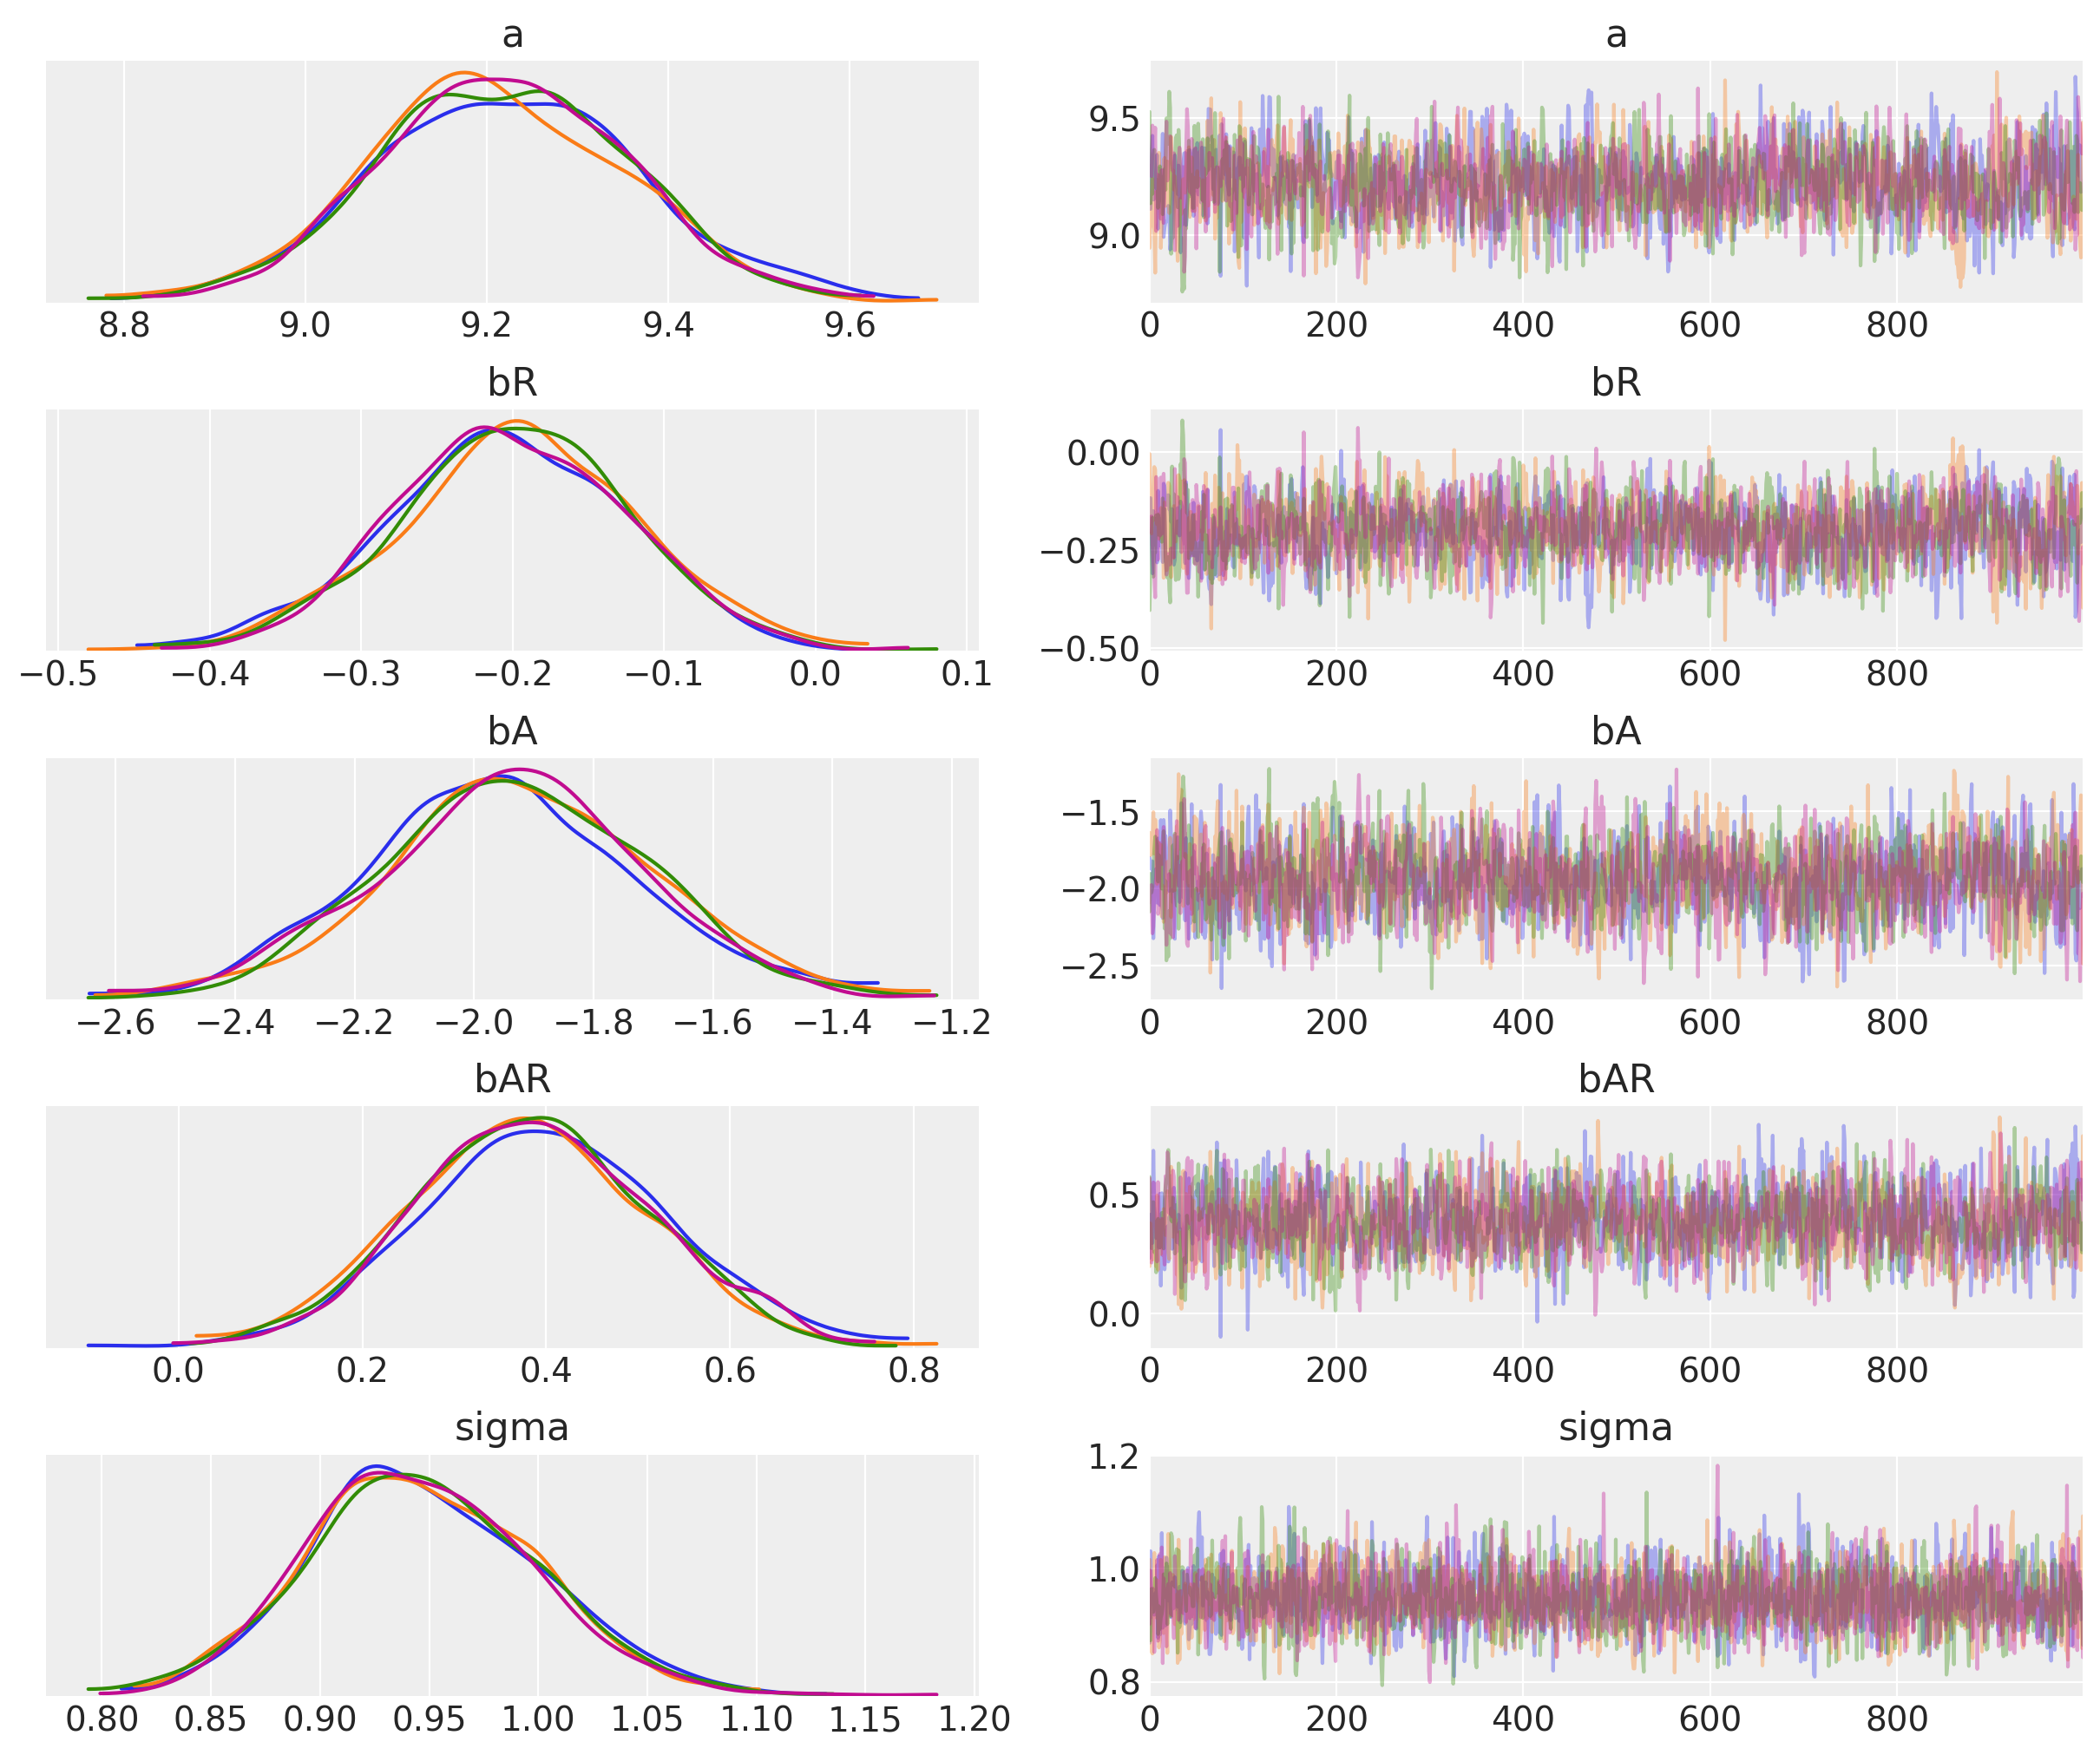

In [25]:
pm.traceplot(trace_m1_2, ['~mu']);

Mean and overall shape of sigma posterior about the same. For uniform and exponential priors

In [26]:
with pm.Model() as m8_1:
    a = pm.Normal('a', 0, 100)
    bR = pm.Normal('bR', 0, 10)
    bA = pm.Normal('bA', 0, 10)
    bAR = pm.Normal('bAR', 0, 10)
    mu = a + bR * rugged_df.rugged + bA * rugged_df.cont_africa + bAR * rugged_df.rugged * rugged_df.cont_africa
    sigma = pm.HalfCauchy('sigma', 2)
    log_gdp = pm.Normal('log_gdp', mu, sigma, observed=rugged_df.log_gdp)
    trace_m8_1 = pm.sample(1000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bAR, bA, bR, a]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:04<00:00, 1838.24draws/s]


In [27]:
az.summary(trace_m8_1, ['~mu'])

mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
a      9.230  0.143   8.956    9.498      0.004    0.003    1626.0  1622.0   
bR    -0.206  0.080  -0.367   -0.066      0.002    0.001    1677.0  1612.0   
bA    -1.962  0.227  -2.381   -1.535      0.005    0.004    1977.0  1950.0   
bAR    0.399  0.133   0.142    0.639      0.003    0.002    2070.0  1999.0   
sigma  0.952  0.053   0.852    1.046      0.001    0.001    3048.0  3034.0   

       ess_bulk  ess_tail  r_hat  
a        1627.0    1996.0    1.0  
bR       1677.0    2000.0    1.0  
bA       1982.0    1984.0    1.0  
bAR      2072.0    2247.0    1.0  
sigma    3060.0    2706.0    1.0

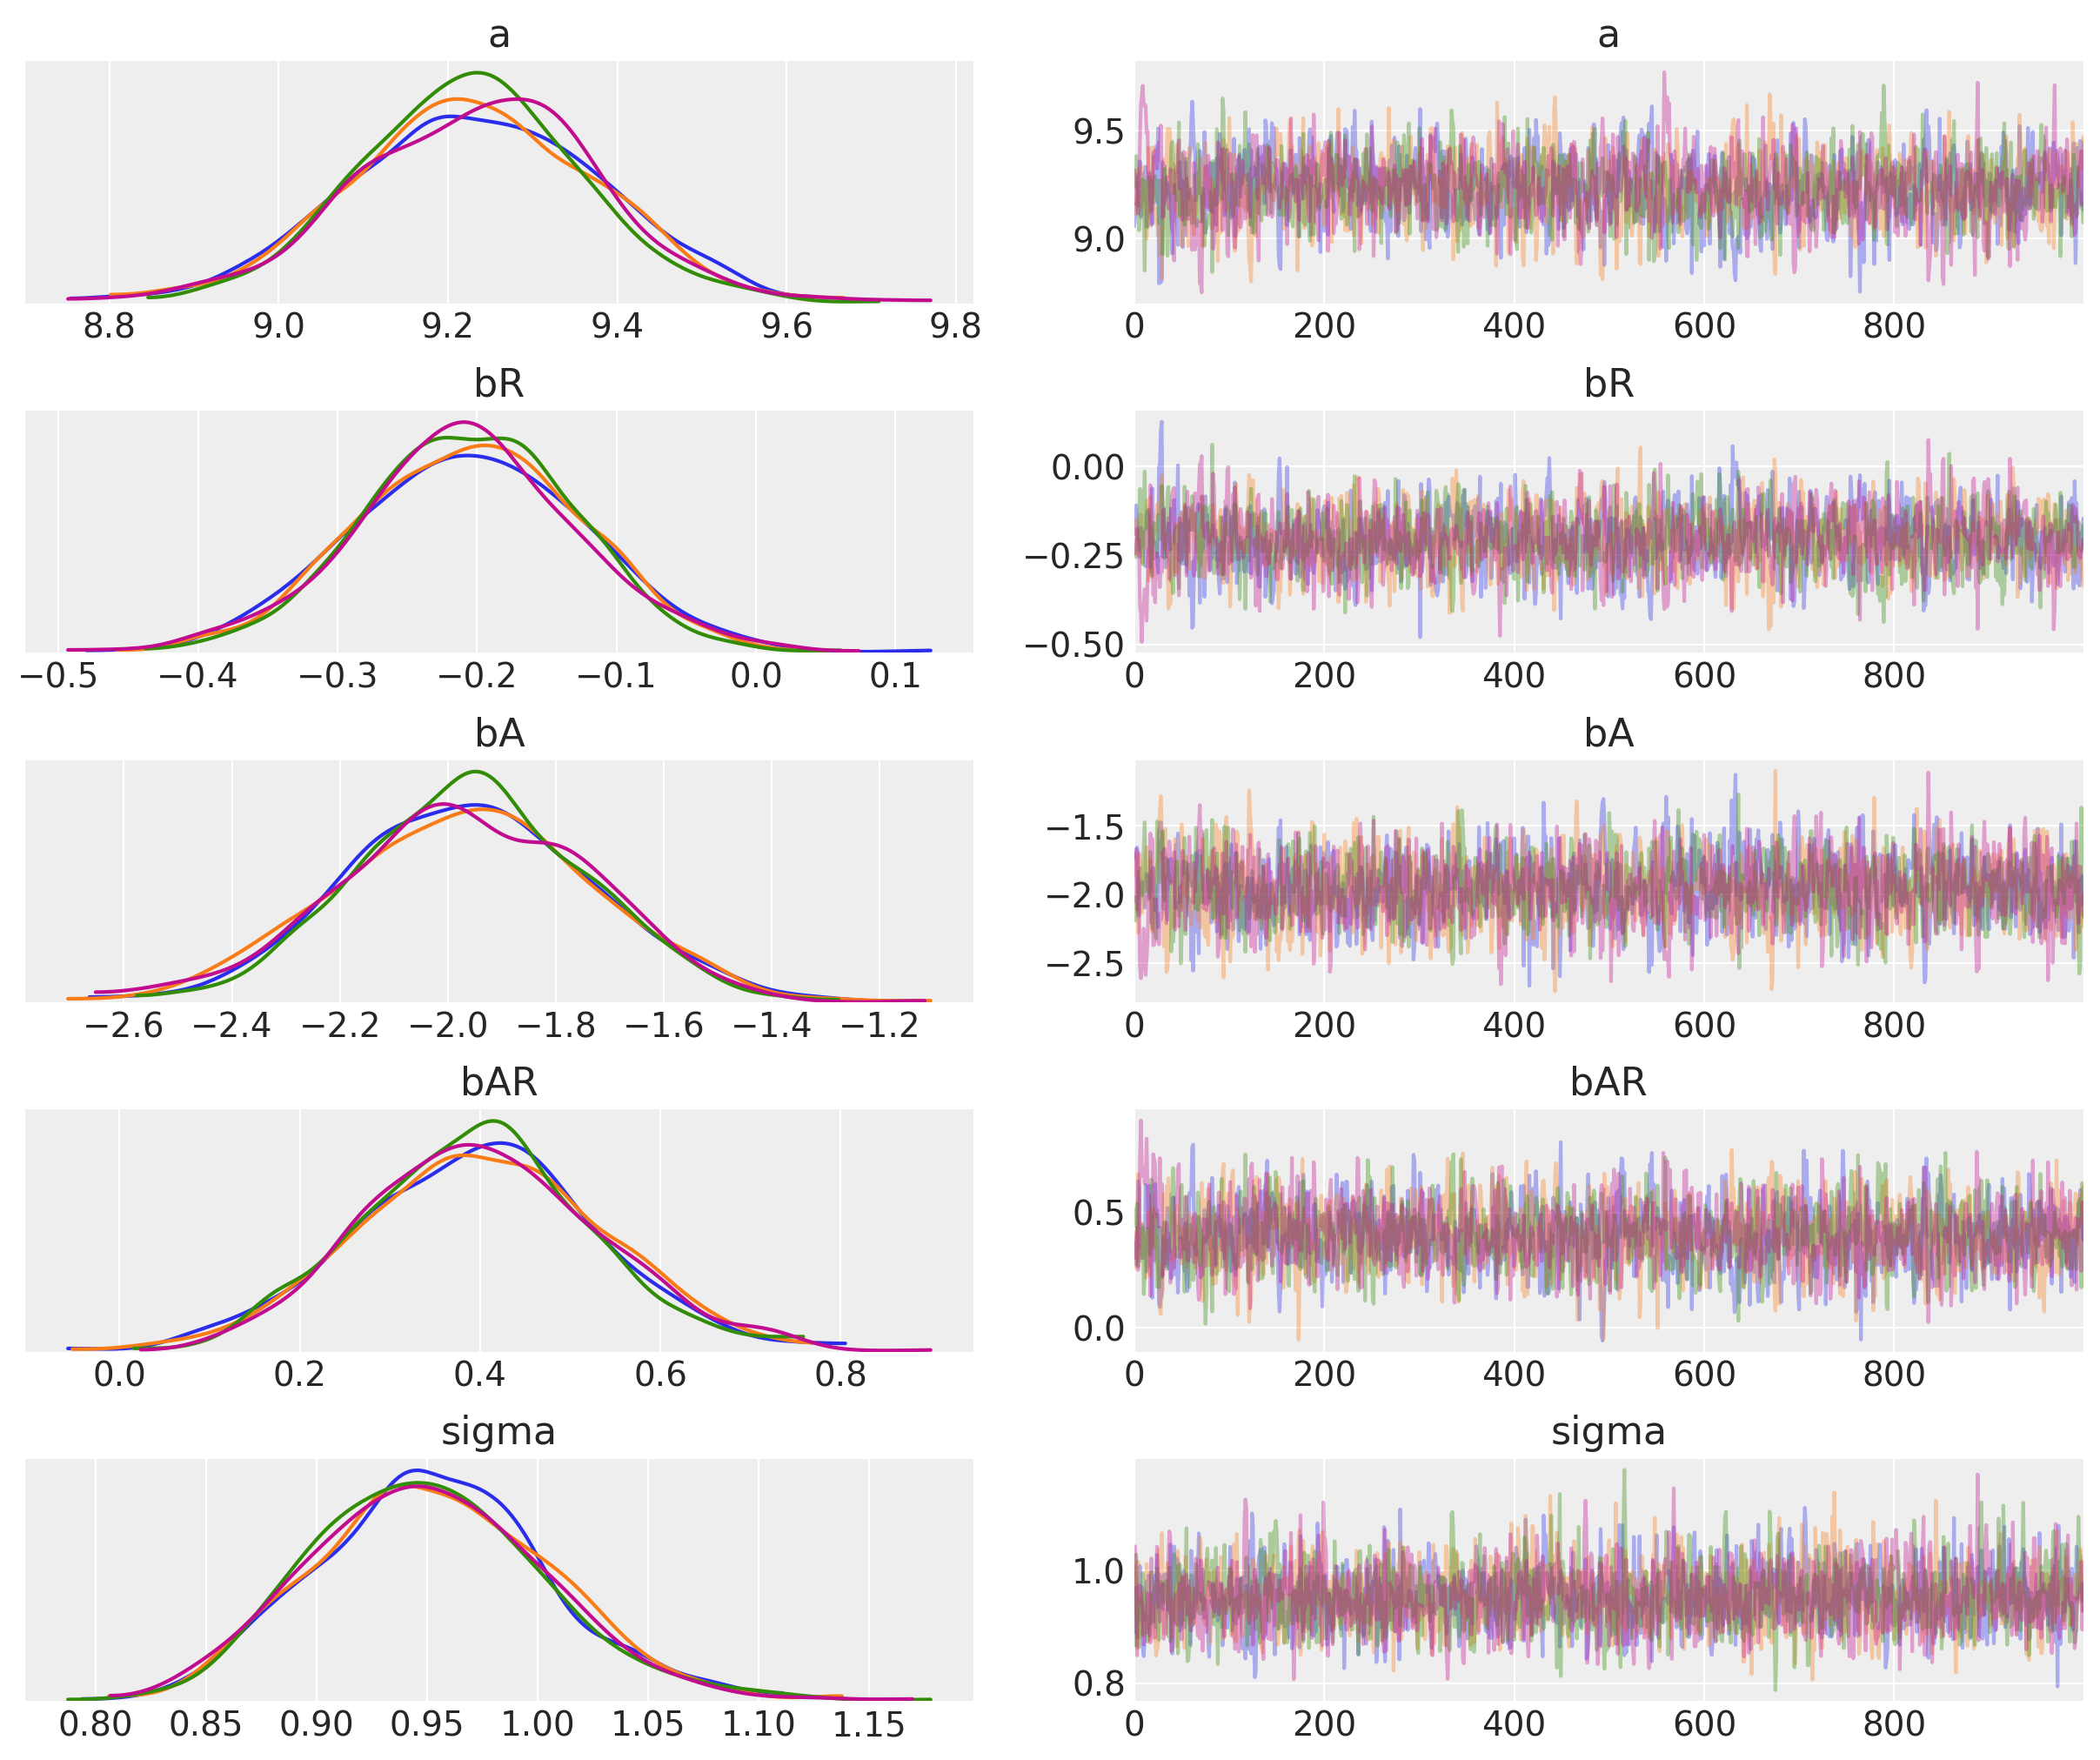

In [28]:
pm.traceplot(trace_m8_1, ['~mu']);

## 8M2

In [47]:
with pm.Model() as m2_1:
    a = pm.Normal('a', 0, 100)
    bR = pm.Normal('bR', 0, 10)
    bA = pm.Normal('bA', 0, 10)
    bAR = pm.Normal('bAR', 0, 10)
    mu = a + bR * rugged_df.rugged + bA * rugged_df.cont_africa + bAR * rugged_df.rugged * rugged_df.cont_africa
    sigma = pm.Exponential('sigma', 0.1)
    log_gdp = pm.Normal('log_gdp', mu, sigma, observed=rugged_df.log_gdp)
    trace_m2_1 = pm.sample(1000, tune = 1000)
    
with pm.Model() as m2_2:
    a = pm.Normal('a', 0, 100)
    bR = pm.Normal('bR', 0, 10)
    bA = pm.Normal('bA', 0, 10)
    bAR = pm.Normal('bAR', 0, 10)
    mu = a + bR * rugged_df.rugged + bA * rugged_df.cont_africa + bAR * rugged_df.rugged * rugged_df.cont_africa
    sigma = pm.HalfCauchy('sigma', 0.1)
    log_gdp = pm.Normal('log_gdp', mu, sigma, observed=rugged_df.log_gdp)
    trace_m2_2 = pm.sample(1000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bAR, bA, bR, a]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:04<00:00, 1834.49draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bAR, bA, bR, a]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:05<00:00, 1441.46draws/s]


In [48]:
az.summary(trace_m2_1, ['~mu'])

mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
a      9.223  0.141   8.966    9.491      0.003    0.002    1963.0  1960.0   
bR    -0.203  0.078  -0.354   -0.062      0.002    0.001    1813.0  1777.0   
bA    -1.946  0.227  -2.342   -1.500      0.005    0.004    1966.0  1966.0   
bAR    0.393  0.134   0.156    0.645      0.003    0.002    1818.0  1755.0   
sigma  0.951  0.053   0.852    1.050      0.001    0.001    4011.0  3990.0   

       ess_bulk  ess_tail  r_hat  
a        1974.0    2230.0    1.0  
bR       1819.0    2380.0    1.0  
bA       1972.0    2473.0    1.0  
bAR      1804.0    2317.0    1.0  
sigma    4005.0    3049.0    1.0

In [49]:
az.summary(trace_m2_2, ['~mu'])

mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
a      9.225  0.141   8.963    9.487      0.003    0.002    2148.0  2143.0   
bR    -0.204  0.077  -0.349   -0.058      0.002    0.001    2170.0  2090.0   
bA    -1.948  0.229  -2.395   -1.524      0.005    0.004    2142.0  2108.0   
bAR    0.392  0.133   0.159    0.656      0.003    0.002    2246.0  2204.0   
sigma  0.945  0.051   0.847    1.039      0.001    0.001    3774.0  3752.0   

       ess_bulk  ess_tail  r_hat  
a        2149.0    2310.0    1.0  
bR       2170.0    2307.0    1.0  
bA       2145.0    2180.0    1.0  
bAR      2255.0    2631.0    1.0  
sigma    3791.0    2655.0    1.0

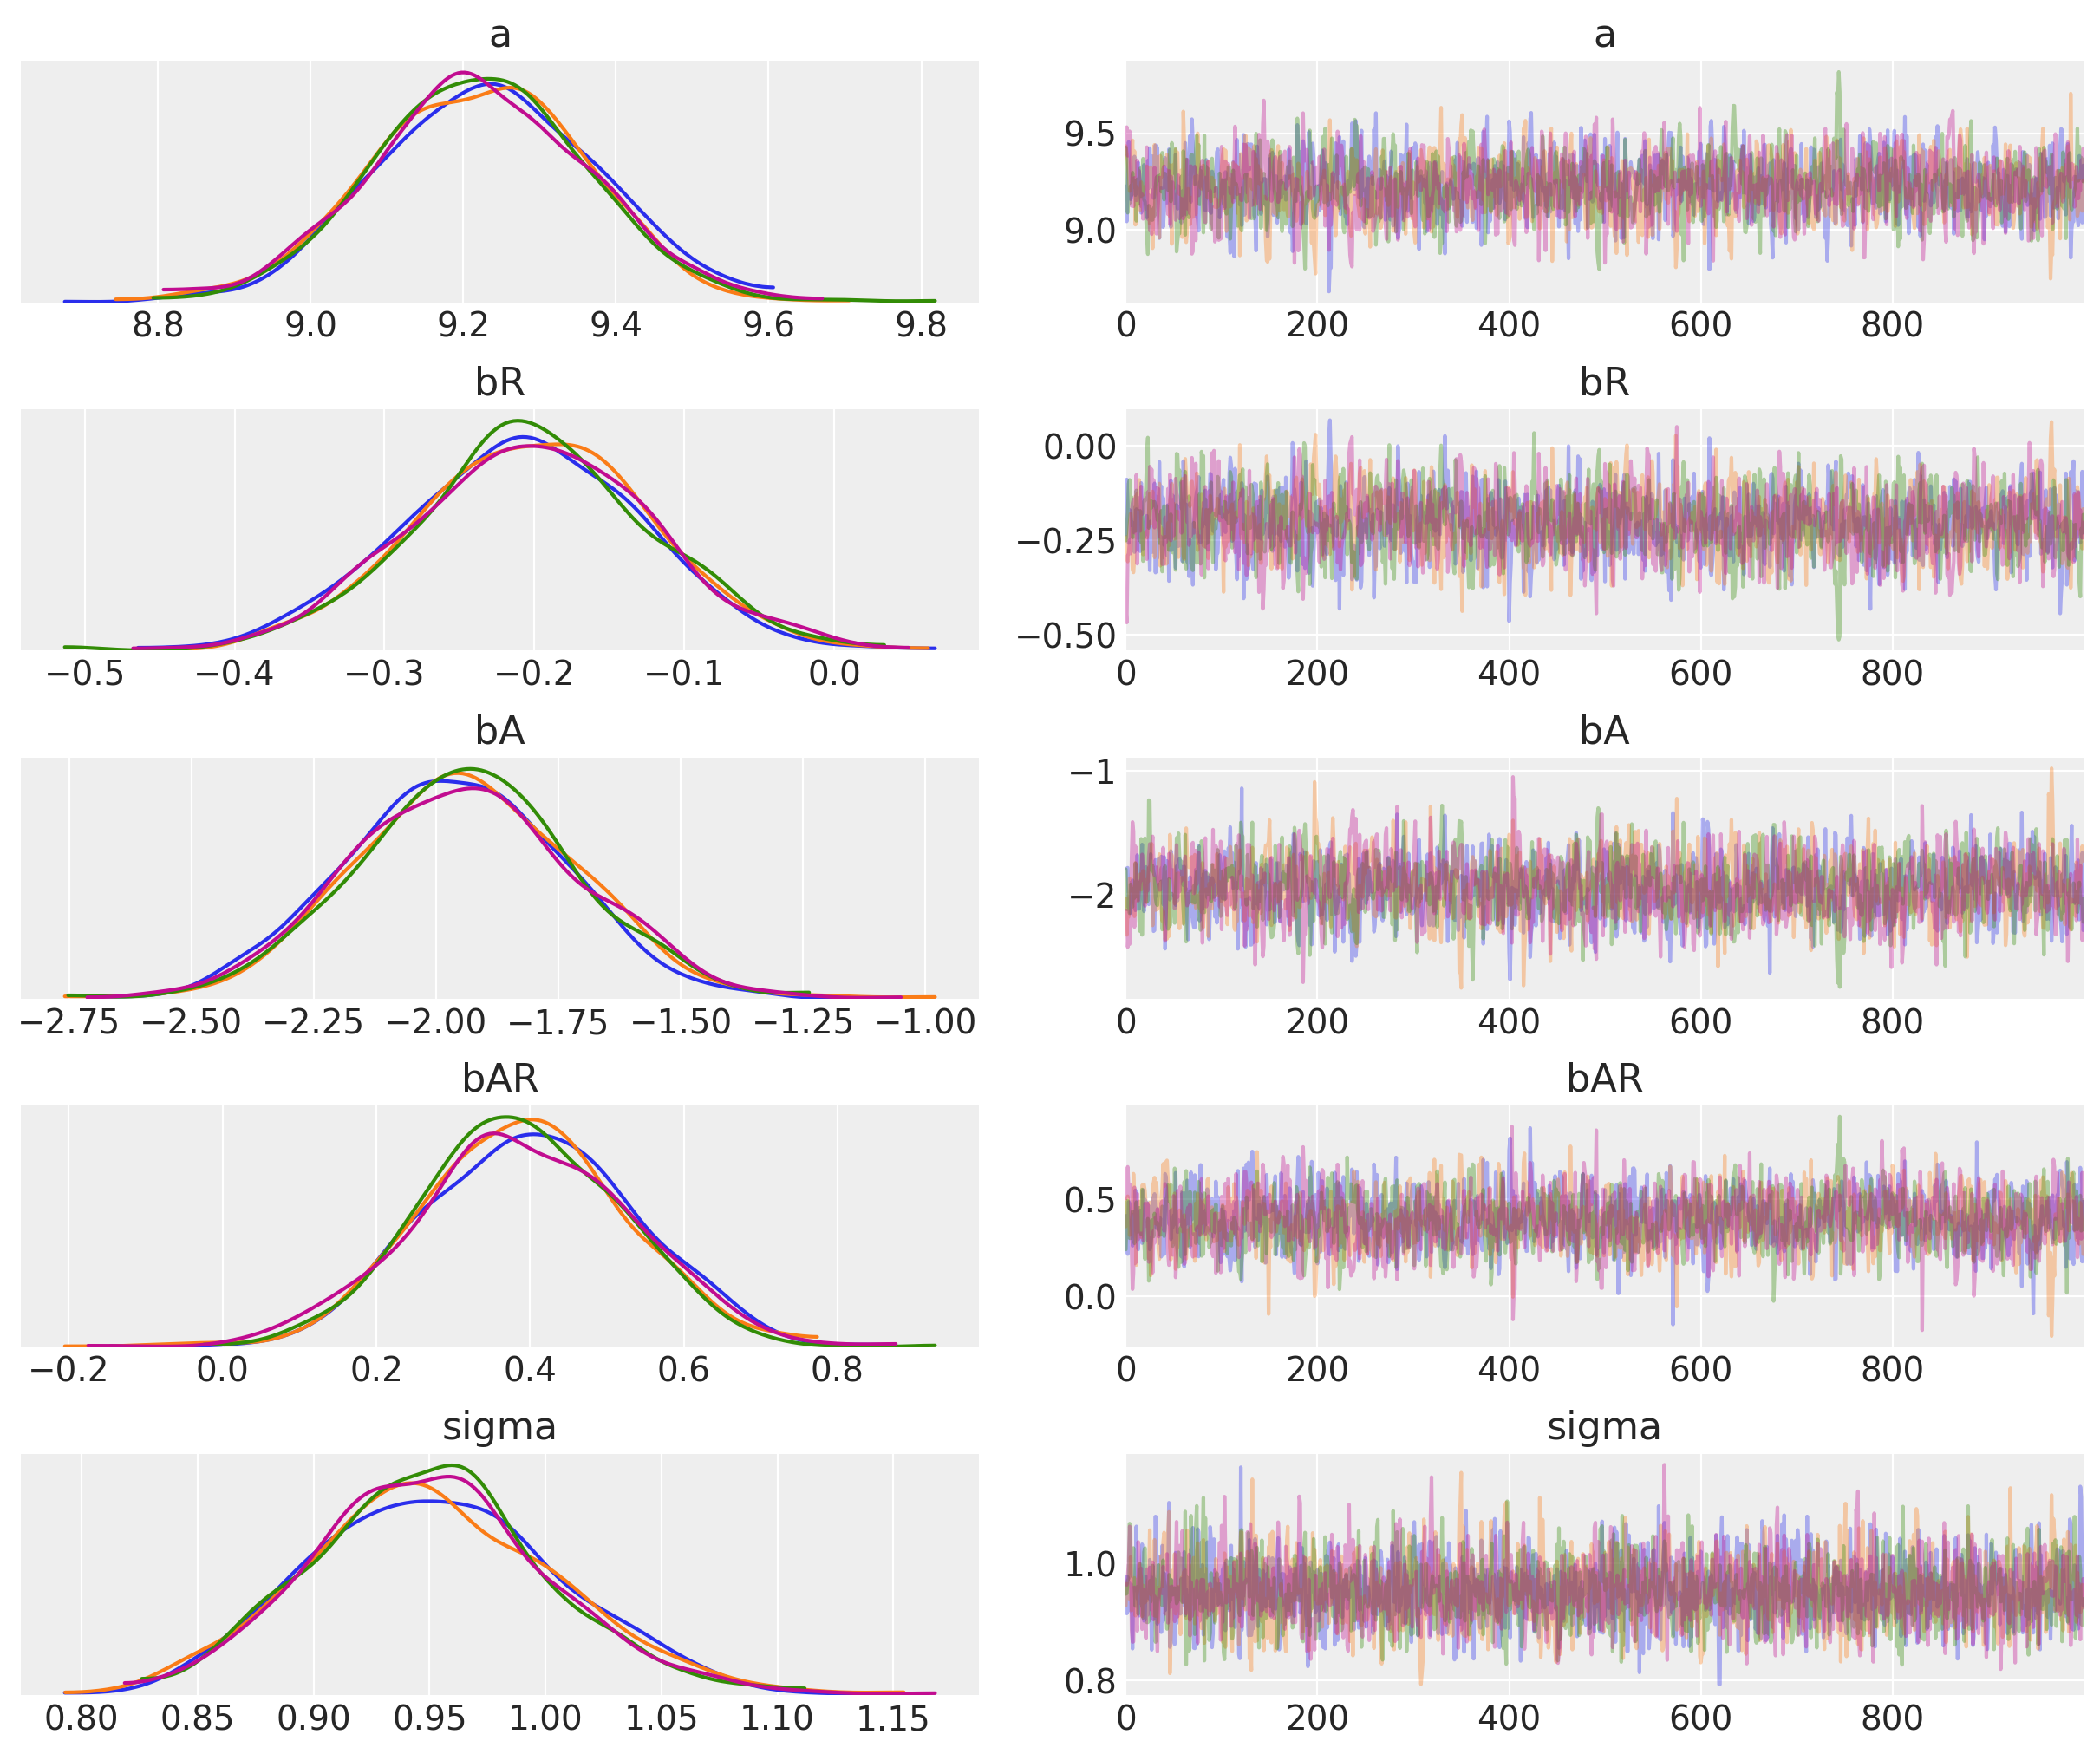

In [50]:
pm.traceplot(trace_m2_1, ['~mu']);

Posteriors for sigma look the same for exponential and HalfCauchy priors. Had errors when trying just a Cauchy distribution.

In [ ]:
pm.traceplot(trace_m2_1, ['~mu']);